#  PROJETO: Prevendo Customer Churn em Operadoras de Telecom

####   Problema de negócio: prever se um cliente vai cancelar seu plano (Sim ou Não) e a probabilidade de uma opção ou outra.

#### Algoritimo de Machine Learning utilizado: Logistic Regression

In [2]:
### Bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sea
from sklearn.feature_selection import VarianceThreshold
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Alteração de parâmetros para visualizar dataset com grande números de colunas

pd.set_option("display.max_columns", 100)

###  Carregamento e limpeza dos dados

In [4]:
## Leitura do dataset

df = pd.read_csv('C:/FCD/PythonSpark/Projeto_telecom/projeto4_telecom_treino.csv')

df.head(10)

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
5,6,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,no
6,7,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
7,8,MO,147,area_code_415,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,no
8,9,LA,117,area_code_408,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,no
9,10,WV,141,area_code_415,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,no


In [5]:
#Verificando Tipos dos atributos

df.dtypes

Unnamed: 0                         int64
state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [6]:
# Quantidade linhas x colunas

df.shape

(3333, 21)

In [7]:
# Verificação de valores null

df.isnull().values.any()

# Verificação valores vazios

df.empty

False

In [8]:
# Verificando o balanceamento da variável target (churn), na qual, valor 'no' = cliente não desistiu e
# valor 'yes' = cliente desistiu da operada;

churn = pd.DataFrame(df.churn.value_counts())
churn['%_churns']=100*churn['churn']/df.shape[0]
churn

# Constata-se que a variável TARGET está proporcionalmente desbalanceada e,portanto, é necessário o balanceamento dos dados para
# aplicar o algoritimo de machine learning.

,churn,%_churns
no,2850,85.508551
yes,483,14.491449


In [9]:
#Remoção da variável 'Unnamed: 0 ', pois trata-se de apenas um índice do dataset;
#Remoção da variável 'number_customer_service_calls', pois refere-se a um número de serviço do cliente(irrelevante para o modelo)
df.drop(['Unnamed: 0'], axis= 1, inplace= True)
df.drop(['number_customer_service_calls'], axis= 1, inplace= True)

In [10]:
df.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,no
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,no
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,no
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,no
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,no
5,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,no
6,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,no
7,MO,147,area_code_415,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,no
8,LA,117,area_code_408,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,no
9,WV,141,area_code_415,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,no


In [11]:
# Limpeza da variável 'area_code'
df.area_code = df.area_code.apply(lambda x: x.split('_')[2])
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,no
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,no
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,no
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,no
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,no


In [12]:
# Convertendo variáveis categóricas para variáveis numéricas (0 e 1): Label Encoding
from sklearn.preprocessing import LabelEncoder

number= LabelEncoder()
df.international_plan= number.fit_transform(df.international_plan)
df.voice_mail_plan = number.fit_transform(df.voice_mail_plan)
df.state = number.fit_transform(df.state)
df.churn = number.fit_transform(df.churn)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,0


In [13]:
#Convertendo 'area_code' to numeric
df.area_code = pd.to_numeric(df['area_code'])

## Análise exploratória (Estatística descritiva)

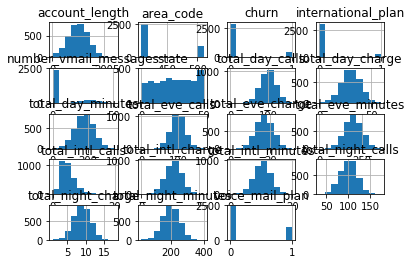

In [14]:
# Análise de distribuição dos dados através de um Histograma;
# Embora a maior parte dos dados apresentarem distribuição normal, será necessário a padronização dos dados para o
#algoritmo Logistic Regression;

df.hist()
plt.show()

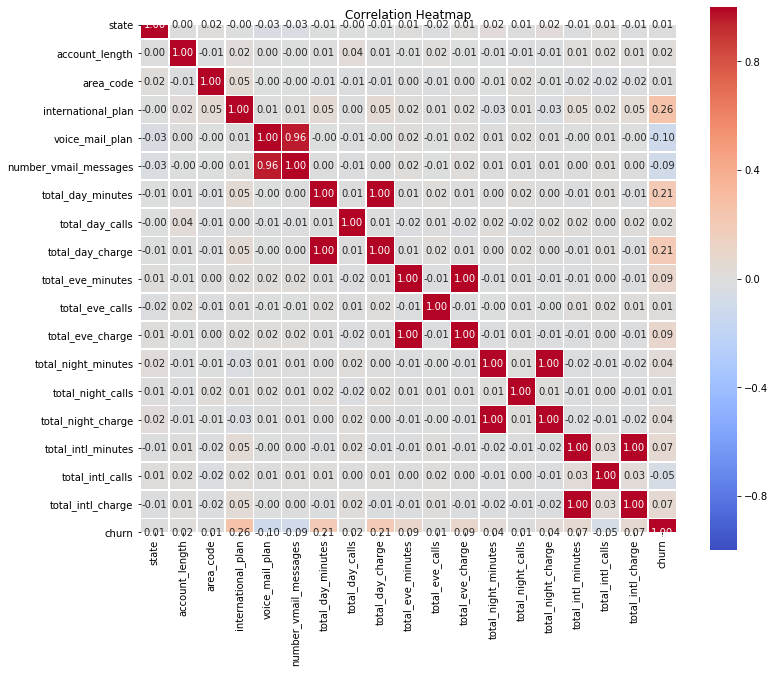

In [17]:
# Matrix de correlação com seaborn
corr_matrix = df.corr(method='pearson')

plt.figure(figsize=(12,10))
plt.title('Correlation Heatmap')
sea.heatmap(corr_matrix, square=True, cmap='coolwarm', xticklabels= True, yticklabels= True,annot=True ,fmt='.2f',linewidths=.5 ,linecolor='white', vmin=-1,vmax=1)
           
plt.show() 

In [18]:
#Correlação com a variável target 'churn'
cor_target = abs(corr_matrix["churn"])

#Selecting highly correlated features

# A correlação entre a variável target e as demais é baixa; apenas 4 variáveis mostraram uma correlação de apenas >=20 %.

relevant_features = cor_target[cor_target>0.2]
relevant_features

international_plan    0.259852
total_day_minutes     0.205151
total_day_charge      0.205151
churn                 1.000000
Name: churn, dtype: float64

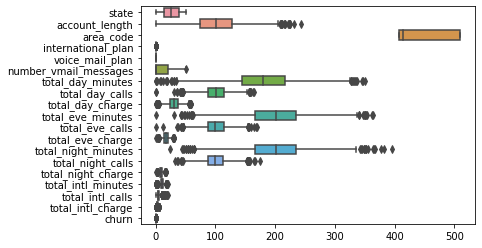

In [19]:
### Boxplot

sea.boxplot(data= df, orient='h')

#Verifica-se diversos outliers presentes nas variáveis;


### Pré-Processamento

### Feature Selection - Seleção Univariada

In [20]:
# Extração de Variáveis com Testes Estatísticos Univariados

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


#Separando input e output
x= df.iloc[:,0:18]
y=df.iloc[:,18]

# Função para seleção de variáveis (4)
best_var = SelectKBest(score_func = chi2, k = 4)

# Executa a função de pontuação em (X, y) e obtém os recursos selecionados
fit = best_var.fit(x, y)

# Reduz X para os recursos selecionados
features = fit.transform(x)

# Resultados
print('\nNúmero original de features:', x.shape[1])
print('\nNúmero reduzido de features:', features.shape[1])
print('\nFeatures (Variáveis Selecionadas): \n\n', features)



Número original de features: 18

Número reduzido de features: 4

Features (Variáveis Selecionadas): 

 [[ 25.   265.1   45.07 197.4 ]
 [ 26.   161.6   27.47 195.5 ]
 [  0.   243.4   41.38 121.2 ]
 ...
 [  0.   180.8   30.74 288.8 ]
 [  0.   213.8   36.35 159.6 ]
 [ 25.   234.4   39.85 265.9 ]]


In [21]:
# As 4 variáveis mais relevantes conforme o teste univariado (qui-quadrado), foram:

#number_vmail_messages;total_day_minutes, total_day_charges,total_eve_minutes

df_new = pd.DataFrame(data=features)
df_new.head()

,0,1,2,3
0,25.0,265.1,45.07,197.4
1,26.0,161.6,27.47,195.5
2,0.0,243.4,41.38,121.2
3,0.0,299.4,50.90,61.9
4,0.0,166.7,28.34,148.3


### Feature Selection -  Recursive Feature Elimination

In [22]:
# Import dos módulos

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# Criação do modelo
modelo = LogisticRegression()

# RFE
rfe = RFE(modelo, 3)
fit = rfe.fit(x, y)


# Print dos resultados
print("Variáveis Preditoras:", x.columns[0:18])
print("Variáveis Selecionadas: %s" % fit.support_)
print("Ranking dos Atributos: %s" % fit.ranking_)
print("Número de Melhores Atributos: %d" % fit.n_features_)

Variáveis Preditoras: Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge'],
      dtype='object')
Variáveis Selecionadas: [False False False  True  True False False False False False False False
 False False False False  True False]
Ranking dos Atributos: [11 16  5  1  1  4  3  8 12  7 10 14 13  9 15  2  1  6]
Número de Melhores Atributos: 3


In [ ]:
# 4 Melhores variáveis conforme método RFE: 'international_plan',voice_mail_plan''total_intl_calls','total_eve_charge'

### Feature Selection - Ensemble

In [23]:
# Importância do Atributo com o Extra Trees Classifier

# Import dos Módulos

from sklearn.ensemble import ExtraTreesClassifier

# Criação do Modelo - Feature Selection
modelo = ExtraTreesClassifier()
modelo.fit(x, y)

# Print dos Resultados
print(x.columns[0:18])
print(modelo.feature_importances_)

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge'],
      dtype='object')
[0.0432953  0.04293907 0.02710827 0.07184055 0.01872    0.01800938
 0.12242037 0.04776417 0.13252386 0.0623604  0.04331638 0.06140953
 0.04592336 0.04526765 0.04754067 0.05329694 0.06058713 0.05567697]


In [24]:
#Ordenando o resultado do maior para o menor
# As 3 variáveis mais importante neste método foram:
# 'total_day_charge','total_day_minutes', 'international_plan'

df_importance = modelo.feature_importances_
df_importance = pd.DataFrame(data=df_importance)
df_importance.sort_values(by=[0], ascending= False)


,0
8,0.132524
6,0.122420
3,0.071841
9,0.062360
11,0.061410
16,0.060587
17,0.055677
15,0.053297
7,0.047764
14,0.047541


### PCA (Principal Component Analysis)

In [25]:
# Feature Extraction

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Gerando outro dataset de treino

#Separando input e output
x1= df.iloc[:,0:18]
y=df.iloc[:,18]

## Padronizando os dados

scaler= StandardScaler().fit(x1)
standardx = scaler.transform(x1)


# Seleção de atributos
pca = PCA(.95)
pca = PCA(n_components = 4)

pca.fit(standardx)
fit_pca = pca.transform(standardx)

pca_df = pd.DataFrame(data = fit_pca, columns = ['principal component 1', 'principal component 2', 'principal component 3',
                                          'principal component 4'])

#Print
pca_df




,principal component 1,principal component 2,principal component 3,principal component 4
0,1.841795,-0.251173,-1.168298,-2.050583
1,-0.460939,-0.311583,0.800381,-2.969701
2,-1.509282,-0.630053,-2.693775,0.343338
3,0.593548,-2.572033,-3.749474,1.381734
4,-1.068688,-0.823577,-0.635462,0.762775
...,...,...,...,...
3328,1.260652,-0.569365,1.702145,-2.497620
3329,0.080122,-0.844403,-1.567299,0.820277
3330,-0.435639,1.998808,0.026402,-0.656141
3331,0.798615,-0.055045,-1.292827,2.745441


### Modelo de Machine Learning: Logistic Regression / PCA

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')


# Criando o modelo
modelo = LogisticRegression()

# Definindo os valores para os folds
num_folds = 10

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state= 10)

# Criando o modelo
modelo = LogisticRegression()
resultado = cross_val_score(modelo, fit_pca, y, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Final: %.2f%%" % (resultado.mean() * 100.0))



Acurácia Final: 85.69%


In [27]:
# Exclusão de variáveis que apresentaram menor correlação ou importância conforme as técnicas de feature selection realizadas

x.drop(['state'], axis=1, inplace= True)
x.drop(['area_code'], axis=1, inplace= True)
x.drop(['account_length'], axis=1, inplace= True)
x.drop(['total_day_calls'], axis=1, inplace= True)
x.drop(['total_eve_calls'], axis=1, inplace= True)
x.drop(['total_night_calls'], axis=1, inplace= True)
x.drop(['total_night_charge'], axis=1, inplace= True)
x.drop(['total_intl_calls'], axis=1, inplace= True)
x.drop(['total_intl_charge'], axis=1, inplace= True)

In [28]:
## Padronizando os dados

scaler= StandardScaler().fit(x)
standard = scaler.transform(x)

### Modelo de Machine Learning: Logistic Regression

In [34]:
# Modelo Logistic regression utilizando divisão dos dados de forma estática, 70% dados de treino e 30% dados para teste

# Import dos módulos

from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Criação do modelo

# Criando os conjuntos de dados de treino e de teste
teste_size = 0.30


# Dividindo os dados em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(standard, y, test_size = teste_size, random_state=27)

# Criando o modelo
model = LogisticRegression()
model.fit(x_treino, y_treino)


# Previsão do modelo
pred = model.predict(x_teste)

#Acurácia
score = model.score(x_teste, y_teste )
print( "\nAcurácia Final: %.2f%%" % (score * 100.00))

print('\nAUC: %.2f%%' % (roc_auc_score(pred, y_teste) * 100))

report = classification_report(y_teste, pred)
print(report)


Acurácia Final: 86.30%

Accuracy Score: 86.30%

AUC: 66.34%
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       871
           1       0.44      0.21      0.28       129

    accuracy                           0.86      1000
   macro avg       0.66      0.58      0.60      1000
weighted avg       0.83      0.86      0.84      1000



In [35]:
# Previsão probabilística do modelo

previsoes = model.predict_proba(x_teste)
previsoes = pd.DataFrame(previsoes)

print(previsoes)

            0         1
0    0.895550  0.104450
1    0.906524  0.093476
2    0.944873  0.055127
3    0.859314  0.140686
4    0.796612  0.203388
..        ...       ...
995  0.800552  0.199448
996  0.959192  0.040808
997  0.905393  0.094607
998  0.896119  0.103881
999  0.903923  0.096077

[1000 rows x 2 columns]


In [39]:
# Logistic Regression utilizando cross-validation

#Separando input e output

x2= df.iloc[:,0:18]
y2=df.iloc[:,18]

# Criando o modelo
modelo = LogisticRegression()

# Definindo os valores para os folds
num_folds = 10

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = 8)

# Criando o modelo
modelo = LogisticRegression()
resultado = cross_val_score(modelo, x2, y2, cv = kfold)


# Acurácia
print("Acurácia Final: %.2f%%" % (resultado.mean() * 100.0))



Acurácia Final: 85.75%


In [43]:
# Balanceamento dos dados (SMOTE)
from imblearn.over_sampling import SMOTE

x1= df.iloc[:,0:18]
y1=df.iloc[:,18]

# Criando os conjuntos de dados de treino e de teste
teste_size = 0.30


# Dividindo os dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = teste_size, random_state=27)


sm = SMOTE(random_state=27)
x_train, y_train = sm.fit_sample(x_train, y_train)

In [51]:
### Logistic Regression após balanceamento da variável target churn (técnica SMOTE)

smote = LogisticRegression(solver='liblinear',C=0.01, penalty='l2', random_state= 22).fit(x_train, y_train)

smote_pred = smote.predict(x_test)


print("\nAccuracy Score: %.2f%%" % (accuracy_score(smote_pred, y_test) * 100))


print('\nAUC: %.2f%%' % (roc_auc_score(smote_pred, y_teste) * 100))

report = classification_report(smote_pred,y_teste)
print(report)

matrix2 = confusion_matrix(y_test, smote_pred)
print('\nConfusion matrix: \n', matrix2)



Accuracy Score: 63.70%

AUC: 57.83%
              precision    recall  f1-score   support

           0       0.63      0.94      0.75       582
           1       0.71      0.22      0.34       418

    accuracy                           0.64      1000
   macro avg       0.67      0.58      0.54      1000
weighted avg       0.66      0.64      0.58      1000


Confusion matrix: 
 [[545 326]
 [ 37  92]]


In [47]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

# train model
rfc = RandomForestClassifier(n_estimators=10).fit(x_treino, y_treino)


rfc_pred = rfc.predict(x_teste)


print("\nAccuracy Score: %.2f%%" % (accuracy_score(rfc_pred, y_teste) * 100))


print("\nAUC Score: %.2f%%" % (roc_auc_score(rfc_pred, y_teste) * 100))

report2 = classification_report(rfc_pred, y_teste)
matrix3 = confusion_matrix(y_teste, rfc_pred)
print(report2)
print('\nConfusion matrix: \n',matrix3)



Accuracy Score: 92.20%

AUC Score: 86.98%
              precision    recall  f1-score   support

           0       0.98      0.93      0.96       917
           1       0.52      0.81      0.63        83

    accuracy                           0.92      1000
   macro avg       0.75      0.87      0.79      1000
weighted avg       0.94      0.92      0.93      1000


Confusion matrix: 
 [[855  16]
 [ 62  67]]


### Otimização dos parâmetros para o modelo Logistic Regression ( Hyperparameter tuning)

In [48]:
# Import das bilbiotecas

#Otimizando o modelo usando o GridSearchCV

from sklearn.model_selection import GridSearchCV

# Definindo os valores que serão testados
valores_grid = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

# Criando o modelo
modelo = LogisticRegression()

# Criando o grid
grid = GridSearchCV(estimator = modelo, param_grid = valores_grid)
grid.fit(x_treino, y_treino)

# Print do resultado
print("Acurácia: %.2f" % (grid.best_score_ * 100))
print("Melhores Parâmetros do Modelo:\n", grid.best_estimator_)


Acurácia: 85.43
Melhores Parâmetros do Modelo:
 LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [50]:
# Criando o modelo com novos parâmetros:

# Acurácia aumentou de 86.30% para 87%;

# AUC aumentou de AUC: 66.34% para 68.71%

model = LogisticRegression(C=0.01, penalty='l2', random_state= 20)
model.fit(x_treino, y_treino)


# Previsão do modelo
pred = model.predict(x_teste)

#Acurácia
score = model.score(x_teste, y_teste )
print( "\nAcurácia Final: %.2f%%" % (score * 100.00))

print('\nAUC: %.2f%%' % (roc_auc_score(pred, y_teste) * 100))

report = classification_report(y_teste, pred)
print(report)


Acurácia Final: 87.00%

AUC: 68.71%
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       871
           1       0.49      0.16      0.24       129

    accuracy                           0.87      1000
   macro avg       0.69      0.57      0.58      1000
weighted avg       0.83      0.87      0.84      1000



In [ ]:
# Conclusão: O algoritmo com melhor desempenho foi o Random Forest, apresentando Accuracy Score: 92.20% e
# AUC Score: 86.98%